In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from models import kNN, sNN, sggNN

/home/josegfer/miniconda3/envs/lusiadas/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
H = torch.load('data/H_train.pt')
y = torch.load('data/y_train.pt')

In [3]:
H_train, H_test, y_train, y_test = train_test_split(H, y, test_size = 0.1, random_state = 42)

In [11]:
model = kNN(k = 1)
model.fit(H_train, y_train)
yhat, shat = model.clf(H_test)

100%|██████████| 5000/5000 [00:17<00:00, 290.47it/s]


In [4]:
model = sNN(tau = 0.1)
model.fit(H_train, y_train)
yhat, shat = model.clf(H_test)

100%|██████████| 5000/5000 [00:22<00:00, 218.93it/s]


In [6]:
from models import ggNN
model = ggNN()
model._gg(path = 'data/gg_val_bootstrap_128.pt')
model.fit(H_train, y_train)
yhat, shat = model.clf(H_test)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:01<00:00, 3096.36it/s]


In [4]:
model = sggNN(tau = 0.1)
model._gg(path = 'data/gg_val_bootstrap_128.pt')
model.fit(H_train, y_train)
yhat, shat = model.clf(H_test)

100%|██████████| 5000/5000 [00:12<00:00, 384.65it/s]


In [12]:
accuracy_score(y_test, yhat)

(0.5648, 0.0)

# knn

In [4]:
# grid = [1, 2, 3]
grid = np.unique(np.logspace(start = 0, stop = 3, num = 150, dtype = int))
log = []
for param in tqdm(grid):
    model = kNN(k = param)
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

100%|██████████| 104/104 [04:24<00:00,  2.54s/it]


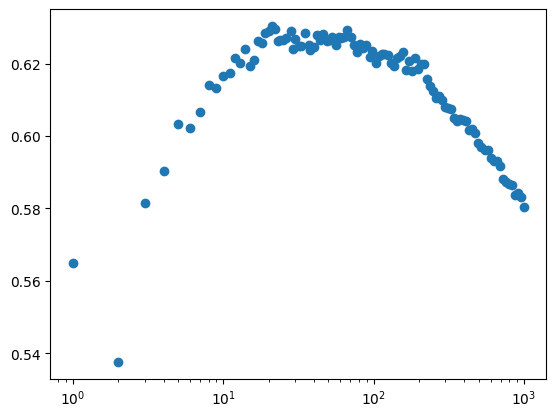

In [5]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [6]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(21, 0.6304)

# snn

In [23]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sNN(tau = param)
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [15:41<00:00,  9.42s/it]


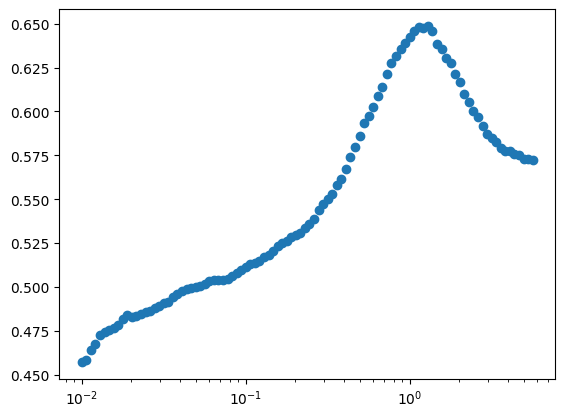

In [24]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [25]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(1.291549665014884, 0.6488)

# sggnn

## p = 128

In [5]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_128.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

100%|██████████| 100/100 [13:20<00:00,  8.01s/it]


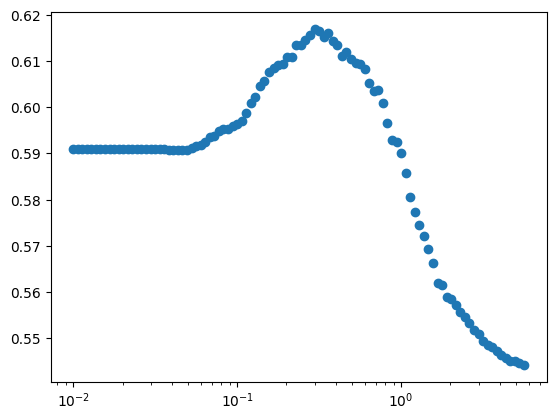

In [6]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [7]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.296634883917773, 0.617)

## p = 64

In [5]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_64.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

100%|██████████| 100/100 [13:18<00:00,  7.99s/it]


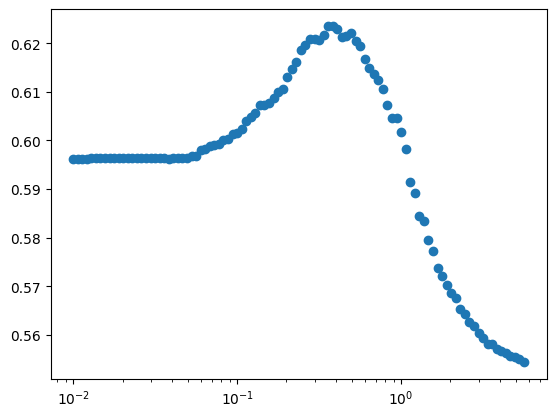

In [6]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [7]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.3593813663804626, 0.6236)

## p = 32

In [8]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_32.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [13:22<00:00,  8.03s/it]


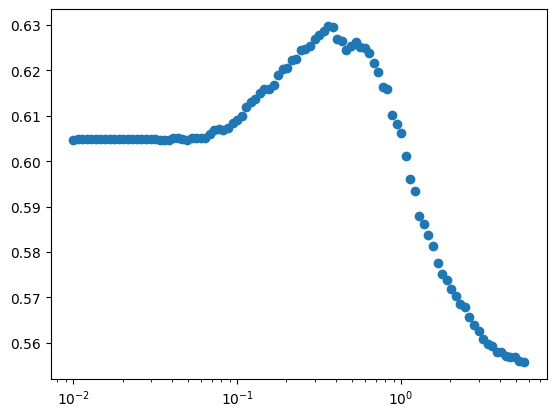

In [9]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [10]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.3593813663804626, 0.6298)

## p = 16

In [11]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_16.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [14:00<00:00,  8.40s/it]


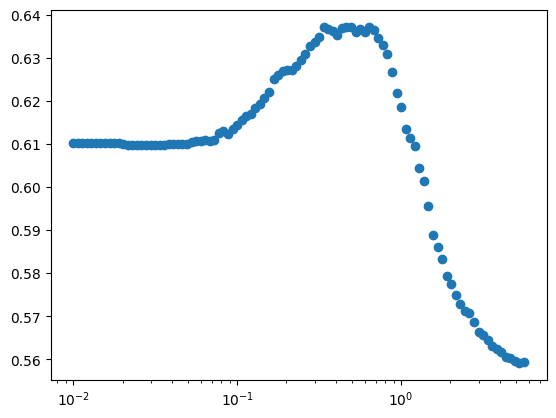

In [12]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [13]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.3371147677550962, 0.6372)

## p = 8

In [14]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_8.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [15:49<00:00,  9.50s/it]


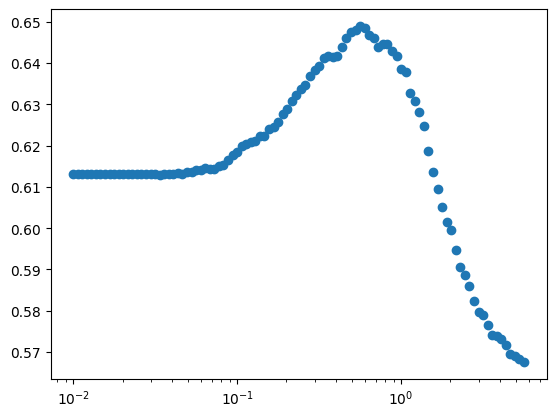

In [15]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [16]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.5623413251903491, 0.649)

## p = 4

In [17]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_4.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [20:13<00:00, 12.13s/it]


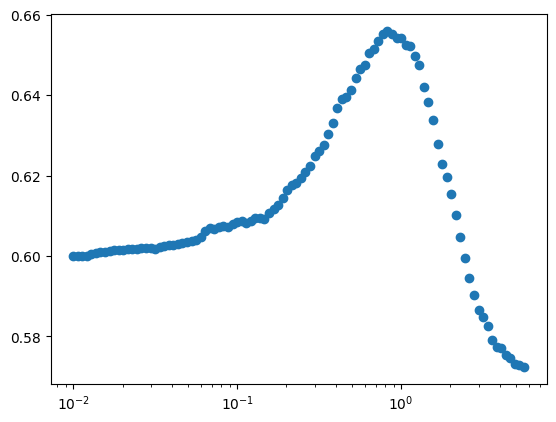

In [18]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [19]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(0.8254041852680182, 0.656)

## p = 2

In [20]:
# grid = [1, 2, 3, 4, 5]
grid = np.logspace(start = -2, stop = 0.75, num = 100)
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg(path = 'data/gg_val_bootstrap_2.pt')
    model.fit(H_train, y_train)
    yhat = model.clf(H_test)
    log.append([accuracy_score(y_test, yhat)])

100%|██████████| 100/100 [45:03<00:00, 27.03s/it]


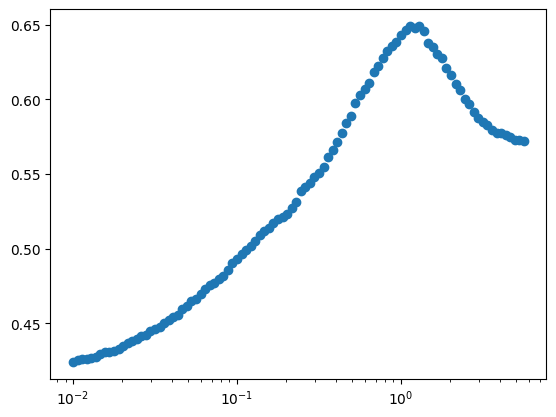

In [21]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log[:, 0]);
# plt.scatter(grid, log[:, 1]);
# plt.scatter(grid, log[:, 2]);
plt.xscale('log');
# plt.savefig('output/sggnn.png')

In [22]:
grid[np.argmax(log[:, 0])], np.max(log[:, 0])

(1.1364636663857242, 0.6492)